# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox 

## Reddit Networks
Using the [Reddit networks dataset](http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite  TV show. Using the data of the selected subreddit, 
answer the following questions:

**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

In [ ]:
!mkdir datasets
!mkdir datasets/new_girl
!wget http://dynamics.cs.washington.edu/nobackup/reddit/NewGirl.tar.gz -O ./datasets/new_girl/NewGirl.tar.gz
!tar -xf ./datasets/new_girl/NewGirl.tar.gz -C ./datasets/new_girl/

--2022-04-20 08:15:44--  http://dynamics.cs.washington.edu/nobackup/reddit/NewGirl.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6948558 (6.6M) [application/x-gzip]
Saving to: ‘./datasets/new_girl/NewGirl.tar.gz’

./datasets/new_girl 100%[===================>]   6.63M  10.3MB/s    in 0.6s    

2022-04-20 08:15:45 (10.3 MB/s) - ‘./datasets/new_girl/NewGirl.tar.gz’ saved [6948558/6948558]



In [ ]:
! cat ./datasets/new_girl/metadata.json
!ls ./datasets/new_girl/

{"start_time": "2011-09-06T13:54:45", "end_time": "2016-10-31T23:09:42", "total_vertices": 4939, "full_graph_key": "/data/timeseries/reddit/NewGirl/NewGirl.2011-09-06.2016-10-31.sgraph", "total_links": 7576, "network_type": "reddit"}metadata.json			      NewGirl.2011-09-06.2014-06-10.sgraph
NewGirl.2011-09-06.2011-10-04.sgraph  NewGirl.2011-09-06.2014-07-08.sgraph
NewGirl.2011-09-06.2011-11-01.sgraph  NewGirl.2011-09-06.2014-08-05.sgraph
NewGirl.2011-09-06.2011-11-29.sgraph  NewGirl.2011-09-06.2014-09-02.sgraph
NewGirl.2011-09-06.2011-12-27.sgraph  NewGirl.2011-09-06.2014-09-30.sgraph
NewGirl.2011-09-06.2012-01-24.sgraph  NewGirl.2011-09-06.2014-10-28.sgraph
NewGirl.2011-09-06.2012-02-21.sgraph  NewGirl.2011-09-06.2014-11-25.sgraph
NewGirl.2011-09-06.2012-03-20.sgraph  NewGirl.2011-09-06.2014-12-23.sgraph
NewGirl.2011-09-06.2012-04-17.sgraph  NewGirl.2011-09-06.2015-01-20.sgraph
NewGirl.2011-09-06.2012-05-15.sgraph  NewGirl.2011-09-06.2015-02-17.sgraph
NewGirl.2011-09-06.2012-06-12.sgr

In [ ]:
!pip install turicreate
!pip install networkx
!pip install python-igraph

     |████████████████████████████████| 92.0 MB 14 kB/s 
     |████████████████████████████████| 322 kB 65.4 MB/s 
     |████████████████████████████████| 3.6 MB 47.7 MB/s 
     |████████████████████████████████| 86.4 MB 80 kB/s 
     |████████████████████████████████| 3.5 MB 49.8 MB/s 
     |████████████████████████████████| 18.3 MB 323 kB/s 
     |████████████████████████████████| 3.8 MB 40.3 MB/s 
     |████████████████████████████████| 20.1 MB 587 kB/s 
     |████████████████████████████████| 449 kB 71.5 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
     |████████████████████████████████| 2.9 MB 42.9 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=81f34d35b49e144b9be57be50d97d752a2f86cdb494b46264a239a1b3e699858
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320859 sha256=7c192688b75

     |████████████████████████████████| 3.1 MB 5.1 MB/s 


In [ ]:
import turicreate as tc 
import networkx as nx
import igraph

# load sgraph using turicreate
sg = tc.load_sgraph("./datasets/new_girl/NewGirl.2011-09-06.2014-07-08.sgraph")
sg.summary()

{'num_edges': 2979, 'num_vertices': 2448}

In [ ]:
def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g

ng = sgraph2nxgraph(sg)
print("Networkx: %s" % nx.info(ng))

Networkx: DiGraph with 2448 nodes and 2979 edges


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


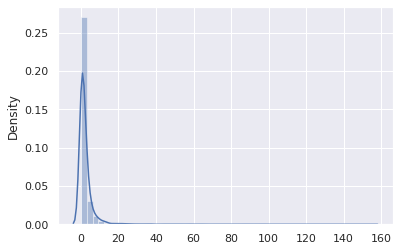

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

d = ng.degree()
sns.set_style("darkgrid")
sns.distplot([v for v in dict(d).values()])

**Task 2:** Create a subgraph of the top-40 users according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

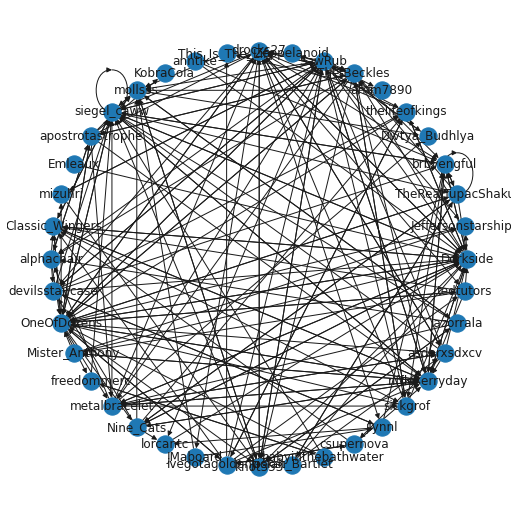

In [ ]:
# the selected centrality algorithm - degree centrality
deg_cent = nx.degree_centrality(ng)

# sort deg_cent
sorted_deg = sorted(deg_cent, key=deg_cent.get, reverse=True)[:40]

plt.figure(figsize=(7,7))
h = ng.subgraph(sorted_deg)
nx.draw_circular(h, with_labels=True)

**Task 3:** Calculate the PageRank, triangles, and average shortest path of each vertex in the graph (15pt)

In [ ]:
# PageRank
pagerank_dict = nx.pagerank(ng)
print("Page Ranks: ", pagerank_dict)

# triangles
triangle_dict = nx.triangles(ng.to_undirected(reciprocal=True))
print("Triangles: ", triangle_dict)

# average shortest path
averages = dict()
for node in ng.nodes():
   paths = nx.single_source_shortest_path(ng, node)
   num_paths = len(paths)
   agg_length = 0

   for lp in paths.values():
     agg_length += len(lp)

   avg_short_path = agg_length/num_paths
   averages[node] = avg_short_path

print("average shortest path: ", averages)

Page Ranks:  {'SirRipo': 0.00021267440212652364, 'Hickspy': 0.00014654135685579817, 'TopesLose': 0.00014654135685579817, 'blueberrymuffinn': 0.00014654135685579817, 'catstar27': 0.0002463245952546277, 'WhiskeyDuty': 0.00014654135685579817, 'tisharoo': 0.00014654135685579817, 'I_no_longer_lurk': 0.00014654135685579817, 'bigwillystyle93': 0.00014654135685579817, 'Blerg_ShutItDown': 0.00014654135685579817, 'TheSneakySeal': 0.00014654135685579817, 'espeo12345': 0.00023461134405424448, 'ours_isthefury': 0.00040318978979056593, 'AtlEm': 0.00014654135685579817, 'poopyflavouredlolly': 0.00014654135685579817, 'yeefuckinhaw': 0.00014654135685579817, 'Connguy': 0.00014654135685579817, 'just_call_in_sick': 0.00014654135685579817, 'apercots': 0.0003466826576386249, 'CoriDori': 0.00014654135685579817, 'briteeyez12': 0.00014654135685579817, 'Brain13': 0.00018808420055357232, 'kayethx': 0.00014654135685579817, 'SepticReVo': 0.00020560474624044115, 'krezmasters': 0.00014654135685579817, 'anjalovesit': 

**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

In [ ]:
ng = sgraph2nxgraph(sg, False, False, False)
#ng.nodes
H = nx.relabel_nodes(ng, lambda x: x.replace("_", " "))

# save gml
nx.write_gml(H, "./datasets/new_girl.gml")

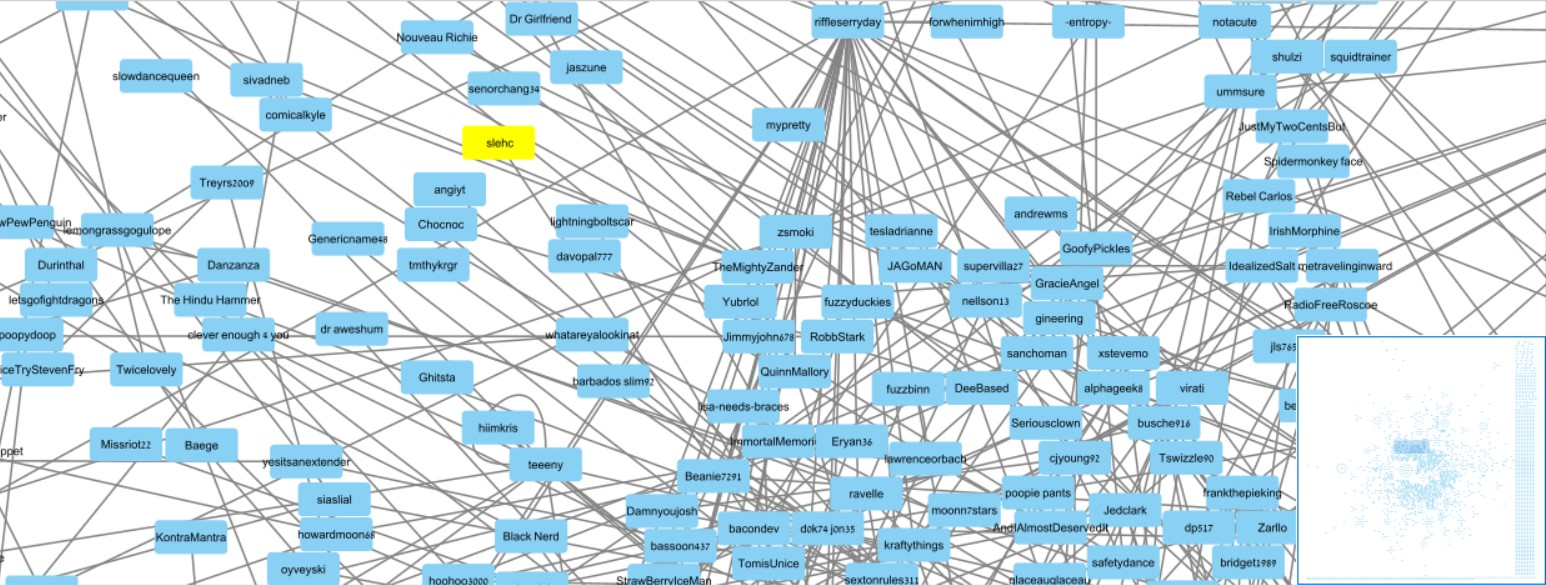

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of verticies and edges in the subgraph (5pt)

#edges : 8


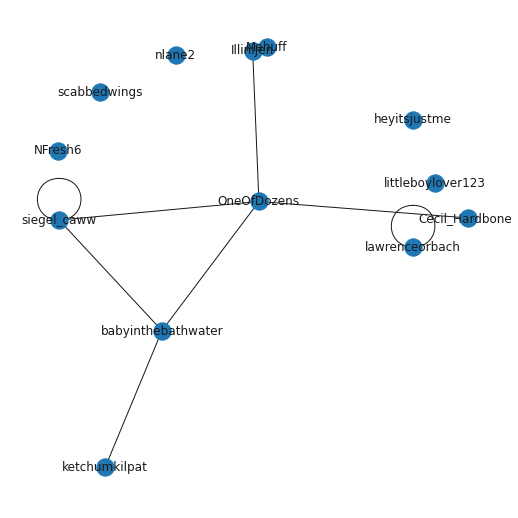

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.centrality import girvan_newman

def vertex_subgraph(node):
    neighbors = ng.neighbors(node)
    sub = ng.subgraph(neighbors)
    return sub


sub = vertex_subgraph("freedommerc")

print(f"#edges : {sub.number_of_edges()}")
# drawing
plt.figure(figsize=(7,7))
nx.draw_kamada_kawai(sub, with_labels=True)

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges

In [ ]:
!mkdir datasets/chessSever
!wget http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz -O ./datasets/chessSever/freechess.tar.gz
!tar -xf ./datasets/chessSever/freechess.tar.gz -C ./datasets/chessSever/

--2022-04-20 10:36:21--  http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6852261483 (6.4G) [application/x-gzip]
Saving to: ‘./datasets/chessSever/freechess.tar.gz’

./datasets/chessSev 100%[===================>]   6.38G  12.3MB/s    in 10m 13s 

2022-04-20 10:46:34 (10.7 MB/s) - ‘./datasets/chessSever/freechess.tar.gz’ saved [6852261483/6852261483]



In [ ]:
!ls datasets/chessSever

FCIS  freechess.tar.gz


In [ ]:
! pip install turicreate

In [ ]:
import turicreate as tc
sf_edges = tc.SFrame.read_csv("./datasets/chessSever/FCIS/fcis_chess.interactions.csv", nrows= 100000)
sf_vertices = tc.SFrame.read_csv("./datasets/chessSever/FCIS/fcis_chess.vertices.csv", nrows= 100000)

Finished parsing file /content/datasets/chessSever/FCIS/fcis_chess.interactions.csv

Parsing completed. Parsed 100 lines in 9.08742 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/chessSever/FCIS/fcis_chess.interactions.csv

Parsing completed. Parsed 100000 lines in 2.9891 secs.

Finished parsing file /content/datasets/chessSever/FCIS/fcis_chess.vertices.csv

Parsing completed. Parsed 100 lines in 1.5259 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/chessSever/FCIS/fcis_chess.vertices.csv

Parsing completed. Parsed 100000 lines in 0.551305 secs.

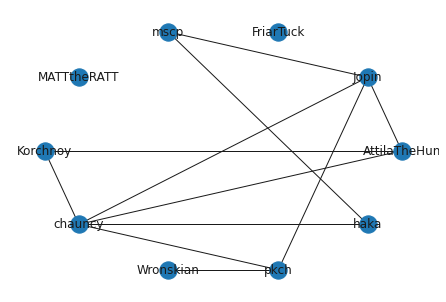

In [ ]:
sg_fcis = tc.SGraph(vertices=sf_vertices, edges=sf_edges,
                    vid_field="v_id", src_field="src_id", dst_field="dst_id")
sg_fcis.summary()
ng = sgraph2nxgraph(sg_fcis,False,False,False)
d = nx.degree_centrality(ng)

# top-10 most centeral players at The Free Internet Chess Sever
_sorted = sorted(d, key=d.get, reverse=True)[:10]

h = ng.subgraph(_sorted)
nx.draw_circular(h, with_labels=True)

**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

In [ ]:
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"danasror","key":"83f2d5cd8d8b7d0c9848067dc056909f"} 

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

!mkdir ./datasets/ltor

# download the dataset from Kaggle and unzip it
!kaggle datasets download paultimothymooney/lord-of-the-rings-data  -p ./datasets/ltor
!unzip ./datasets/ltor/*.zip  -d ./datasets/ltor
!ls ./datasets/ltor

  0% 0.00/88.0k [00:00<?, ?B/s]
100% 88.0k/88.0k [00:00<00:00, 46.7MB/s]
Archive:  ./datasets/ltor/lord-of-the-rings-data.zip
  inflating: ./datasets/ltor/lotr_characters.csv  
  inflating: ./datasets/ltor/lotr_scripts.csv  
lord-of-the-rings-data.zip  lotr_characters.csv  lotr_scripts.csv


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("./datasets/ltor/lotr_characters.csv")
df = df.fillna('')
df

,birth,death,gender,hair,height,name,race,realm,spouse
0,,,Female,,,Adanel,Men,,Belemir
1,TA 2978,"February 26 ,3019",Male,Dark (book) Light brown (movie),,Boromir,Men,,
2,,"March ,3019",Male,,,Lagduf,Orcs,,
3,TA 280,TA 515,Male,,,Tarcil,Men,Arnor,Unnamed wife
4,,,Male,,,Fire-drake of Gondolin,Dragon,,
...,...,...,...,...,...,...,...,...,...
906,"Mid ,First Age",FA 495,Female,,,Aerin,Men,,Brodda
907,,,,,,Aerandir,,,
908,"YT during the ,Noontide of Valinor",FA 455,Male,Golden,,Aegnor,Elves,,"Loved ,Andreth but remained unmarried"
909,TA 2917,TA 3010,Male,,,Adrahil II,Men,,Unnamed wife


In [ ]:
import re
def normailze_spouse(s):
    if s in {'','Unnamed wife', 'None' }:
        return None
    if "Loved" not in s:
        return s
    
    r = re.compile("Loved ,(\w+)")
    l = r.findall(s)
    if len(l) > 0:
        return l[0]
df['normspouse'] = df['spouse'].apply(lambda s: normailze_spouse(s))
    
links_df = df[['name', 'normspouse', 'race', 'gender']]
links_df = links_df.dropna()
links_df

,name,normspouse,race,gender
0,Adanel,Belemir,Men,Female
7,Angrod,Eldalótë,Elves,Male
10,Ar-Pharazôn,Tar-Míriel,Men,Male
12,Ar-Gimilzôr,Inzilbêth,Men,Male
21,Tarannon Falastur,Berúthiel,Men,Male
...,...,...,...,...
897,Ailinel,Orchaldor,Men,Female
898,Almarian,Tar-Meneldur,Men,Female
899,Algund,None known,Men,Male
906,Aerin,Brodda,Men,Female


In [ ]:
import networkx as nx
ng = nx.Graph()
ng = nx.from_pandas_edgelist(links_df, 'name', 'normspouse')
for n in ng:
  race_list = list(links_df[links_df['name'] == str(n)]['race'])
  gender_list = list(links_df[links_df['name'] == str(n)]['gender'])
  if len(race_list) > 0:
    ng.nodes[n]['race'] = race_list[0]
  else: 
     ng.nodes[n]['race'] = "Unknown"
  if len(gender_list) > 0:
    ng.nodes[n]['gender'] = gender_list[0]
  else: 
     ng.nodes[n]['gender'] = "Unknown"

ng.nodes(data = True)

nx.write_gml(ng, "lord_of_rings.gml")

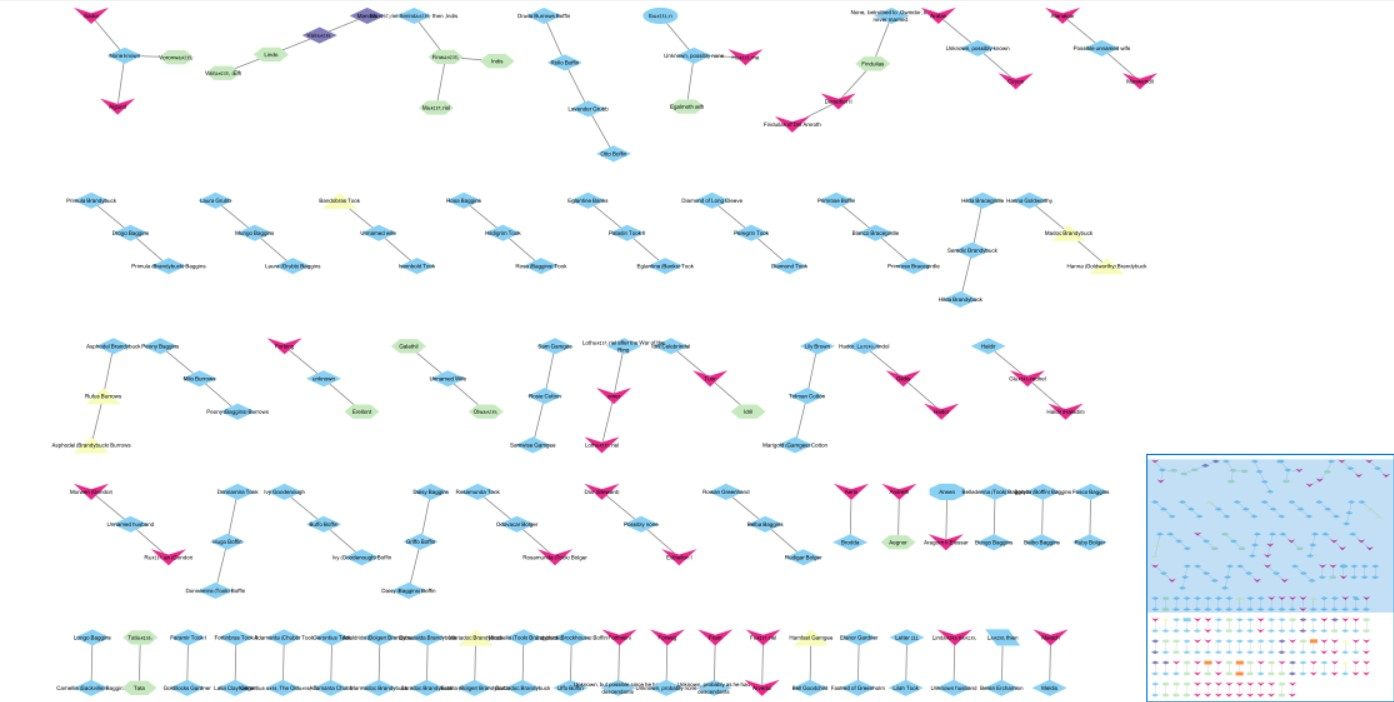

### Additional Questions for Practice

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges